<a href="https://colab.research.google.com/github/Tony14100/Date-cocktail/blob/main/%D0%A1%D0%BC%D0%B5%D1%88%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D1%82%D0%B8%D0%BF%D1%8B_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85(%D0%9D%D0%B0%D0%B1%D0%BE%D1%80_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B4%D0%BB%D1%8F_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%B0%D1%80%D0%B5%D0%BD%D0%B4%D0%BD%D0%BE%D0%B9_%D0%BF%D0%BB%D0%B0%D1%82%D1%8B_%D0%B7%D0%B0_%D0%B6%D0%B8%D0%BB%D1%8C%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BHK: количество спален, прихожей, кухни.
Аренда: Аренда домов / квартир / квартир.
Размер: размер домов / квартир / квартир в квадратных футах.
Этаж: дома / Квартиры / Квартиры, расположенные на каком этаже, и общее количество этажей (пример: первый этаж из 2, 3 из 5 и т. Д.)
Тип района: размер домов / квартир / квартир, рассчитанный либо по Супер площади, либо по площади ковра, либо по площади застройки.
Местоположение района: местоположение домов / квартир / квартир.
<b>Город</b>: город, в котором расположены дома / квартиры / квартиры.
<b>Статус меблировки</b>: статус меблировки домов / квартир / квартир, либо они меблированы, либо частично меблированы, либо без мебели.
Предпочитаемый арендатор: тип арендатора, предпочитаемый владельцем или агентом.
Ванная комната: количество ванных комнат.
Контактное лицо: С кем вам следует связаться для получения дополнительной информации о домах / квартирах / квартирах.

In [ ]:
!git clone https://github.com/pair-code/facets.git

Cloning into 'facets'...
remote: Enumerating objects: 1843, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1843 (delta 5), reused 7 (delta 2), pack-reused 1822
Receiving objects: 100% (1843/1843), 22.72 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (1167/1167), done.


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving House_Rent_Dataset.csv to House_Rent_Dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
House_Rent = pd.read_csv('House_Rent_Dataset.csv')

In [ ]:
House_Rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fsg = FeatureStatisticsGenerator()
dataframes = [
{'table': House_Rent, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
<facets-overview id="elem"></facets-overview>
<script>
document.querySelector("#elem").protoInput = "{protostr}";
</script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
SAMPLE_SIZE = 1000#@param

train_dive = House_Rent.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
<facets-dive id="elem" height="600"></facets-dive>
<script>
var data = {jsonstr};
document.querySelector("#elem").data = data;
</script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

In [ ]:
House_Rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
House_features = House_Rent.copy()
House_labels = House_features.pop('Rent')

In [ ]:
inputs = {}

for name, column in House_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'Posted On': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Posted On')>,
 'BHK': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'BHK')>,
 'Size': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Size')>,
 'Floor': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Floor')>,
 'Area Type': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Area Type')>,
 'Area Locality': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Area Locality')>,
 'City': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'City')>,
 'Furnishing Status': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Furnishing Status')>,
 'Tenant Preferred': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Tenant Preferred')>,
 'Bathroom': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Bathroom')>,
 'Point of Contact': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'Point of Contact')

In [ ]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(House_Rent[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'normalization_1')>

In [ ]:
preprocessed_inputs = [all_numeric_inputs]

In [ ]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = layers.StringLookup(vocabulary=np.unique(House_features[name]))
  one_hot = layers.CategoryEncoding(max_tokens=lookup.vocab_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

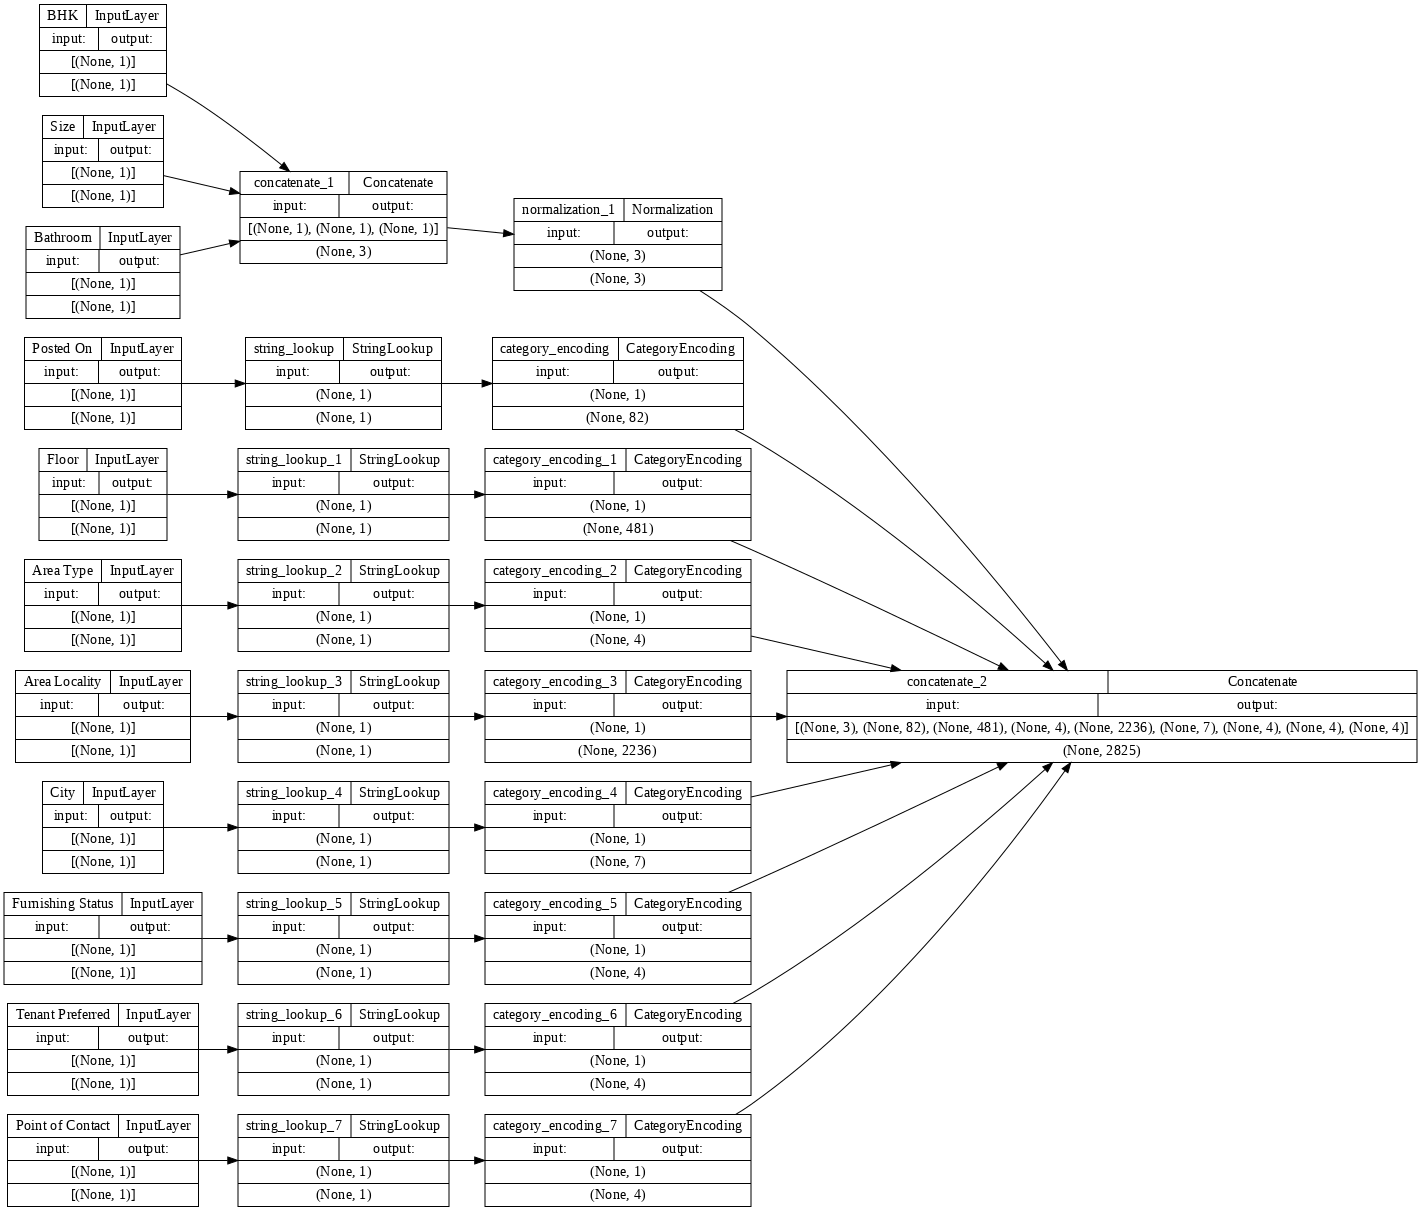

In [ ]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

House_features_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = House_features_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [ ]:
House_features_dict = {name: np.array(value) 
                         for name, value in House_features.items()}

In [ ]:
def House_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.optimizers.Adam())
  return model

House_model = House_model(House_features_preprocessing, inputs)

In [ ]:
House_model.fit(x=House_features_dict, y=House_labels, epochs=10)

Epoch 1/10
149/149 [==============================] - 2s 7ms/step - loss: -386957.5000
Epoch 2/10
149/149 [==============================] - 1s 7ms/step - loss: -2241872.7500
Epoch 3/10
149/149 [==============================] - 1s 7ms/step - loss: -5942759.0000
Epoch 4/10
149/149 [==============================] - 1s 6ms/step - loss: -11491476.0000
Epoch 5/10
149/149 [==============================] - 1s 6ms/step - loss: -18785586.0000
Epoch 6/10
149/149 [==============================] - 1s 5ms/step - loss: -27739568.0000
Epoch 7/10
149/149 [==============================] - 1s 5ms/step - loss: -38232336.0000
Epoch 8/10
149/149 [==============================] - 1s 5ms/step - loss: -50154684.0000
Epoch 9/10
149/149 [==============================] - 1s 5ms/step - loss: -63446348.0000
Epoch 10/10
149/149 [==============================] - 1s 5ms/step - loss: -78119960.0000
